In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import os
from datetime import datetime

from plotnine import *
from mizani.formatters import comma_format, percent_format

In [3]:
start_date = "1960-01-01"
end_date = "2024-12-31"

In [4]:
# Create data directory if it doesn't exist
if not os.path.exists("data"):
    os.makedirs("data")

# Connect to database (creates file if it doesn't exist)
tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

print("Database connection established")

Database connection established


In [5]:
from io import BytesIO
import boto3
from botocore.client import Config


class ConnectMinio:
    """
    Connection handler for DataCore's MinIO-based data storage.
    
    Credentials should be set as environment variables:
    - MINIO_ENDPOINT: The API endpoint URL
    - MINIO_ACCESS_KEY: Your access key
    - MINIO_SECRET_KEY: Your secret key
    - MINIO_BUCKET: The bucket containing financial data
    """
    
    def __init__(self):
        self.MINIO_ENDPOINT = os.environ.get("MINIO_ENDPOINT")
        self.MINIO_ACCESS_KEY = os.environ.get("MINIO_ACCESS_KEY")
        self.MINIO_SECRET_KEY = os.environ.get("MINIO_SECRET_KEY")
        self.REGION = os.environ.get("MINIO_REGION", "us-east-1")
        
        if not all([self.MINIO_ENDPOINT, self.MINIO_ACCESS_KEY, self.MINIO_SECRET_KEY]):
            raise ValueError(
                "Missing required environment variables. "
                "Please set MINIO_ENDPOINT, MINIO_ACCESS_KEY, and MINIO_SECRET_KEY."
            )
        
        self.s3 = boto3.client(
            "s3",
            endpoint_url=self.MINIO_ENDPOINT,
            aws_access_key_id=self.MINIO_ACCESS_KEY,
            aws_secret_access_key=self.MINIO_SECRET_KEY,
            region_name=self.REGION,
            config=Config(signature_version="s3v4"),
        )

    def test_connection(self):
        """Verify connection by listing available buckets."""
        resp = self.s3.list_buckets()
        print("Connected successfully. Available buckets:")
        for bucket in resp.get("Buckets", []):
            print(f"  - {bucket['Name']}")
        return True


# Establish connection
try:
    conn = ConnectMinio()
    s3 = conn.s3
    conn.test_connection()
    bucket_name = os.environ.get("MINIO_BUCKET")
except Exception as e:
    print(f"Could not connect to DataCore: {e}")
    print("Proceeding with existing local data if available.")
    s3 = None
    bucket_name = None

Connected successfully. Available buckets:
  - dsteam-data
  - rawbctc


In [6]:
if s3 is not None and bucket_name is not None:
    # Download price data from DataCore
    prices_raw = pd.read_csv(
        BytesIO(
            s3.get_object(
                Bucket=bucket_name,
                Key="historycal_price/dataset_historical_price.csv"
            )["Body"].read()
        ),
        low_memory=False
    )
    print(f"Downloaded {len(prices_raw):,} price observations")
else:
    # Load from existing database if available
    try:
        prices_raw = pd.read_sql_query(
            "SELECT * FROM prices_daily_raw",
            con=tidy_finance
        )
        print(f"Loaded {len(prices_raw):,} price observations from local database")
    except:
        print("No price data available. Please check DataCore connection.")
        prices_raw = pd.DataFrame()

Downloaded 4,307,791 price observations


In [7]:
if not prices_raw.empty:
    prices = prices_raw.copy()
    
    # Convert date column
    prices["date"] = pd.to_datetime(prices["date"])
    
    # Calculate adjusted close price
    # The adjustment ratio accounts for splits, dividends, etc.
    prices["adjusted_close"] = prices["close_price"] * prices["adj_ratio"]
    
    # Standardize column names
    prices = prices.rename(columns={
        "vol_total": "volume",
        "open_price": "open",
        "low_price": "low",
        "high_price": "high",
        "close_price": "close"
    })
    
    # Ensure proper sorting for return calculations
    prices = prices.sort_values(["symbol", "date"]).reset_index(drop=True)
    
    print(f"Processed prices for {prices['symbol'].nunique():,} securities")
    print(f"Date range: {prices['date'].min().date()} to {prices['date'].max().date()}")

Processed prices for 1,837 securities
Date range: 2010-01-04 to 2025-05-12


In [8]:
if not prices_raw.empty:
    # Compute daily returns
    prices["ret"] = (
        prices.groupby("symbol")["adjusted_close"]
        .pct_change()
    )
    
    # Handle extreme values
    # Returns below -100% are economically impossible
    prices["ret"] = prices["ret"].clip(lower=-0.99)
    
    # Check for data quality
    print("Return statistics:")
    print(prices["ret"].describe().round(4))

Return statistics:


count    4.305128e+06
mean              inf
std               NaN
min     -9.900000e-01
25%     -4.200000e-03
50%      0.000000e+00
75%      3.200000e-03
max               inf
Name: ret, dtype: float64


/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1020: RuntimeWarning: invalid value encountered in subtract


In [9]:
if not prices_raw.empty:
    # Resample to monthly frequency
    prices_monthly = (
        prices
        .sort_values(["symbol", "date"])
        .groupby("symbol")
        .resample("ME", on="date")  # Month-End frequency
        .last()
        .drop(columns=["symbol", "date"], errors="ignore")
        .reset_index()
    )
    
    # Compute monthly returns
    prices_monthly["ret"] = (
        prices_monthly.groupby("symbol")["adjusted_close"]
        .pct_change()
    )
    
    prices_monthly["ret"] = prices_monthly["ret"].clip(lower=-0.99)
    
    print(f"Monthly observations: {len(prices_monthly):,}")

Monthly observations: 210,331


In [10]:
if s3 is not None and bucket_name is not None:
    # Define paths to fundamental data files
    fundamental_paths = [
        "fundamental_annual_1767674486317/fundamental_annual_1.xlsx",
        "fundamental_annual_1767674486317/fundamental_annual_2.xlsx",
        "fundamental_annual_1767674486317/fundamental_annual_3.xlsx",
    ]
    
    # Load and concatenate
    fundamental_dfs = []
    for path in fundamental_paths:
        try:
            obj = s3.get_object(Bucket=bucket_name, Key=path)
            df_tmp = pd.read_excel(BytesIO(obj["Body"].read()))
            fundamental_dfs.append(df_tmp)
        except Exception as e:
            print(f"Could not load {path}: {e}")
    
    if fundamental_dfs:
        fundamentals_raw = pd.concat(fundamental_dfs, ignore_index=True)
        print(f"Loaded {len(fundamentals_raw):,} fundamental observations")
    else:
        fundamentals_raw = pd.DataFrame()
else:
    try:
        fundamentals_raw = pd.read_sql_query(
            "SELECT * FROM comp_vn_raw",
            con=tidy_finance
        )
        print(f"Loaded {len(fundamentals_raw):,} fundamental observations from local database")
    except:
        print("No fundamental data available.")
        fundamentals_raw = pd.DataFrame()

/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default


/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default


/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default


Loaded 22,821 fundamental observations


In [11]:
if not fundamentals_raw.empty:
    comp_vn = fundamentals_raw.copy()
    
    # Standardize identifiers
    comp_vn["symbol"] = comp_vn["symbol"].astype(str).str.upper().str.strip()
    comp_vn["year"] = pd.to_numeric(comp_vn["year"], errors="coerce").astype("Int64")
    
    # Drop rows missing key identifiers
    comp_vn = comp_vn.dropna(subset=["symbol", "year"])
    
    # Convert numeric columns
    numeric_columns = [
        "total_asset", "total_equity", "total_liabilities",
        "total_current_liabilities", "total_current_asset",
        "is_net_revenue", "is_cogs", "is_manage_expense",
        "is_interest_expense", "is_gross_profit", "is_eat",
        "ca_cce", "ca_total_inventory", "ca_acc_receiv",
        "cfo_depreciation", "capex", "total_cfo",
        "is_ebt", "is_cit_expense", "is_net_business_profit",
        "cfo_receive", "cfo_inventory", "cfo_payale",
        "na_tax_deferred", "nl_tax_deferred", "e_preferred_stock",
        "cl_loan", "cl_finlease", "cl_due_long_debt",
        "nl_loan", "nl_finlease",
        "is_cos_of_sales", "basic_eps", "is_shareholders_eat"
    ]
    
    for col in numeric_columns:
        if col in comp_vn.columns:
            comp_vn[col] = pd.to_numeric(comp_vn[col], errors="coerce")
    
    # Handle duplicates: keep row with most non-missing values
    comp_vn["_completeness"] = comp_vn.notna().sum(axis=1)
    comp_vn = (
        comp_vn
        .sort_values(["symbol", "year", "_completeness"])
        .drop_duplicates(subset=["symbol", "year"], keep="last")
        .drop(columns=["_completeness"])
        .reset_index(drop=True)
    )
    
    print(f"Cleaned fundamentals: {len(comp_vn):,} observations")
    print(f"Unique firms: {comp_vn['symbol'].nunique():,}")
    print(f"Year range: {comp_vn['year'].min()} to {comp_vn['year'].max()}")

Cleaned fundamentals: 21,232 observations
Unique firms: 1,554
Year range: 1998 to 2023


In [12]:
if not fundamentals_raw.empty:
    # Fiscal year-end date
    comp_vn["datadate"] = pd.to_datetime(comp_vn["year"].astype(str) + "-12-31")
    
    # Balance sheet items
    comp_vn["at"] = comp_vn["total_asset"]  # Total assets
    comp_vn["act"] = comp_vn["total_current_asset"]  # Current assets
    comp_vn["lt"] = comp_vn["total_liabilities"]  # Total liabilities
    comp_vn["lct"] = comp_vn["total_current_liabilities"]  # Current liabilities
    comp_vn["seq"] = comp_vn["total_equity"]  # Stockholders' equity
    
    # Income statement items
    comp_vn["sale"] = comp_vn["is_net_revenue"]  # Revenue
    comp_vn["cogs"] = comp_vn.get("is_cogs", 0)  # Cost of goods sold
    comp_vn["xsga"] = comp_vn.get("is_manage_expense", 0)  # SG&A expenses
    comp_vn["xint"] = comp_vn.get("is_interest_expense", 0)  # Interest expense
    
    # Cash flow items
    comp_vn["oancf"] = comp_vn.get("total_cfo", np.nan)  # Operating cash flow
    comp_vn["capx"] = comp_vn.get("capex", np.nan)  # Capital expenditures
    
    # Deferred taxes (for book equity calculation)
    comp_vn["txditc"] = comp_vn.get("na_tax_deferred", 0).fillna(0)
    comp_vn["txdb"] = comp_vn.get("nl_tax_deferred", 0).fillna(0)
    
    # Preferred stock
    comp_vn["pstk"] = comp_vn.get("e_preferred_stock", 0).fillna(0)

In [13]:
if not fundamentals_raw.empty:
    # Compute book equity
    comp_vn["be"] = (
        comp_vn["seq"]
        + comp_vn["txditc"].fillna(0)
        - comp_vn["pstk"].fillna(0)
    )
    
    # Set negative or zero book equity to missing
    # This is standard practice—negative BE makes ratios meaningless
    comp_vn["be"] = comp_vn["be"].apply(
        lambda x: np.nan if pd.isna(x) or x <= 0 else x
    )
    
    print(f"Observations with valid book equity: {comp_vn['be'].notna().sum():,}")

Observations with valid book equity: 20,235


In [14]:
if not fundamentals_raw.empty:
    # Operating profitability (Fama-French definition)
    # OP = (Revenue - COGS - SG&A - Interest) / Book Equity
    comp_vn["op"] = (
        (comp_vn["sale"] 
         - comp_vn["cogs"].fillna(0)
         - comp_vn["xsga"].fillna(0)
         - comp_vn["xint"].fillna(0))
        / comp_vn["be"]
    )
    
    # Investment (asset growth)
    # First, create lagged assets
    comp_vn_lag = (
        comp_vn[["symbol", "year", "at"]]
        .assign(year=lambda x: x["year"] + 1)
        .rename(columns={"at": "at_lag"})
    )
    
    comp_vn = comp_vn.merge(comp_vn_lag, on=["symbol", "year"], how="left")
    
    # Investment = (Assets_t / Assets_{t-1}) - 1
    comp_vn["inv"] = comp_vn["at"] / comp_vn["at_lag"] - 1
    comp_vn.loc[comp_vn["at_lag"] <= 0, "inv"] = np.nan

In [15]:
if not fundamentals_raw.empty:
    debt_columns = ["cl_loan", "cl_finlease", "cl_due_long_debt", "nl_loan", "nl_finlease"]
    
    for col in debt_columns:
        if col not in comp_vn.columns:
            comp_vn[col] = 0
    
    comp_vn["total_debt"] = (
        comp_vn["cl_loan"].fillna(0)
        + comp_vn["cl_finlease"].fillna(0)
        + comp_vn["cl_due_long_debt"].fillna(0)
        + comp_vn["nl_loan"].fillna(0)
        + comp_vn["nl_finlease"].fillna(0)
    )
    
    # Also compute SG&A for financial statement analysis
    comp_vn["selling_general_and_administrative_expenses"] = (
        comp_vn.get("is_cos_of_sales", 0).fillna(0)
        + comp_vn.get("is_manage_expense", 0).fillna(0)
    )

In [16]:
if not fundamentals_raw.empty:
    required_columns = ["at", "lt", "seq", "sale"]
    
    comp_vn = comp_vn.dropna(subset=required_columns)
    comp_vn = comp_vn[comp_vn["at"] > 0]  # Assets must be positive
    comp_vn = comp_vn[comp_vn["sale"] >= 0]  # Sales cannot be negative
    
    # Keep only the last observation per firm-year
    comp_vn = (
        comp_vn
        .sort_values("datadate")
        .groupby(["symbol", "year"])
        .tail(1)
        .reset_index(drop=True)
    )
    
    print(f"Final fundamental observations: {len(comp_vn):,}")
    print(f"Unique firms: {comp_vn['symbol'].nunique():,}")

Final fundamental observations: 20,091
Unique firms: 1,502


In [17]:
if not fundamentals_raw.empty and not prices_raw.empty:
    # Estimate shares outstanding from fundamentals
    # Shares = Net Income / EPS
    comp_vn["shrout"] = (
        comp_vn["is_shareholders_eat"] / comp_vn["basic_eps"]
    )
    
    # Add year to prices for merging
    prices_monthly["year"] = prices_monthly["date"].dt.year
    
    # Merge shares outstanding onto monthly prices
    prices_monthly = prices_monthly.merge(
        comp_vn[["symbol", "year", "shrout"]],
        on=["symbol", "year"],
        how="left"
    )
    
    # Compute market capitalization
    # Market Cap = Price × Shares Outstanding
    prices_monthly["mktcap"] = prices_monthly["close"] * prices_monthly["shrout"]
    
    # Convert to millions and handle zeros
    prices_monthly["mktcap"] = (
        prices_monthly["mktcap"] / 1e6
    ).replace(0, np.nan)

In [18]:
if not fundamentals_raw.empty and not prices_raw.empty:
    prices_monthly["mktcap_lag"] = (
        prices_monthly
        .groupby("symbol")["mktcap"]
        .shift(1)
    )

In [19]:
if not prices_raw.empty:
    # Vietnam 10-year government bond yield (approximately 4% annualized)
    # This is a reasonable proxy when Fama-French Vietnam data isn't available
    annual_rf = 0.04
    monthly_rf = annual_rf / 12
    
    # Create risk-free rate series
    rf_monthly = pd.DataFrame({
        "date": pd.date_range(
            start=prices_monthly["date"].min(),
            end=prices_monthly["date"].max(),
            freq="ME"
        ),
        "risk_free": monthly_rf
    })
    
    # Merge and compute excess returns
    prices_monthly = prices_monthly.merge(rf_monthly, on="date", how="left")
    
    prices_monthly["ret_excess"] = prices_monthly["ret"] - prices_monthly["risk_free"]
    
    # Bound excess returns at -100%
    prices_monthly["ret_excess"] = prices_monthly["ret_excess"].clip(lower=-1)

In [20]:
if not prices_raw.empty:
    # Remove rows with missing returns or market cap
    prices_monthly = prices_monthly.dropna(
        subset=["ret_excess", "mktcap", "mktcap_lag"]
    )
    
    # Remove infinite values
    prices_monthly = prices_monthly.replace([np.inf, -np.inf], np.nan)
    prices_monthly = prices_monthly.dropna(subset=["ret_excess"])
    
    print(f"Final monthly price observations: {len(prices_monthly):,}")

Final monthly price observations: 160,482


In [21]:
if not prices_raw.empty:
    # Compute value-weighted market return
    factors_monthly = (
        prices_monthly
        .groupby("date")
        .apply(
            lambda x: pd.Series({
                "mkt_excess": np.average(
                    x["ret_excess"],
                    weights=x["mktcap_lag"]
                ) if x["mktcap_lag"].sum() > 0 else np.nan
            }),
            include_groups=False
        )
        .reset_index()
    )
    
    # Add risk-free rate for reference
    factors_monthly = factors_monthly.merge(
        rf_monthly,
        on="date",
        how="left"
    )
    
    print("Market factor statistics:")
    print(factors_monthly["mkt_excess"].describe().round(4))

Market factor statistics:
count    167.0000
mean      -0.0130
std        0.0585
min       -0.2133
25%       -0.0406
50%       -0.0117
75%        0.0193
max        0.1682
Name: mkt_excess, dtype: float64


In [22]:
if not fundamentals_raw.empty:
    comp_vn.to_sql(
        name="comp_vn",
        con=tidy_finance,
        if_exists="replace",
        index=False
    )
    print(f"Stored {len(comp_vn):,} fundamental observations in 'comp_vn' table")

Stored 20,091 fundamental observations in 'comp_vn' table


In [23]:
if not prices_raw.empty:
    prices_monthly.to_sql(
        name="prices_monthly",
        con=tidy_finance,
        if_exists="replace",
        index=False
    )
    print(f"Stored {len(prices_monthly):,} price observations in 'prices_monthly' table")

Stored 160,482 price observations in 'prices_monthly' table


In [24]:
if not prices_raw.empty:
    factors_monthly.to_sql(
        name="factors_ff5_monthly",
        con=tidy_finance,
        if_exists="replace",
        index=False
    )
    print(f"Stored {len(factors_monthly):,} factor observations in 'factors_ff5_monthly' table")

Stored 167 factor observations in 'factors_ff5_monthly' table


In [25]:
# Example: Load monthly prices
prices_from_db = pd.read_sql_query(
    sql="SELECT * FROM prices_monthly",
    con=tidy_finance,
    parse_dates={"date"}
)

print(f"Retrieved {len(prices_from_db):,} observations from database")
prices_from_db.head(3)

Retrieved 160,482 observations from database


,symbol,date,#,id,adj_ratio,average_price,basic_price,buy_count,buy_vol_foreign,buy_val_foreigh,...,vol_putth,volume,year,adjusted_close,ret,shrout,mktcap,mktcap_lag,risk_free,ret_excess
0,A32,2018-11-30,2186706.0,2186706.0,1.72102,32.0,32.0,0.0,0.0,0.0,...,0.0,0.0,2018,55.072640,0.235521,6.800000e+06,217.60,176.12,0.003333,0.232188
1,A32,2018-12-31,2186726.0,2186726.0,1.72102,30.2,30.2,0.0,0.0,0.0,...,0.0,0.0,2018,51.974804,-0.056250,6.800000e+06,205.36,217.60,0.003333,-0.059583
2,A32,2019-01-31,2186748.0,2186748.0,1.64034,30.5,30.5,0.0,0.0,0.0,...,0.0,0.0,2019,50.030370,-0.037411,6.800000e+06,207.40,205.36,0.003333,-0.040744


In [26]:
# Example: Load specific columns with a filter
recent_data = pd.read_sql_query(
    sql="""
    SELECT symbol, date, ret_excess, mktcap 
    FROM prices_monthly 
    WHERE date >= '2020-01-01'
    """,
    con=tidy_finance,
    parse_dates={"date"}
)

print(f"Retrieved {len(recent_data):,} observations from 2020 onward")

Retrieved 63,904 observations from 2020 onward


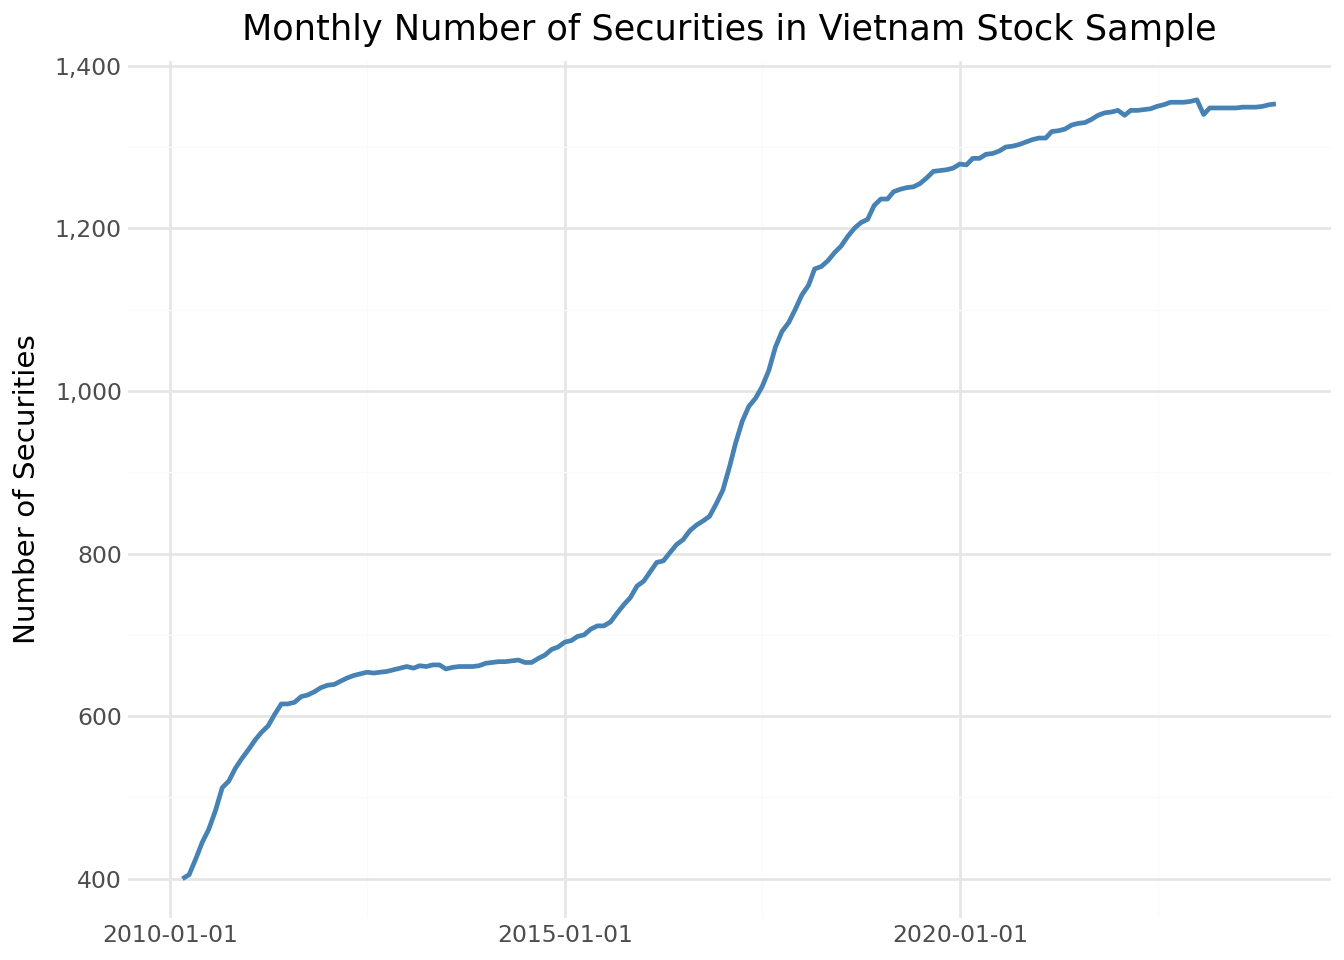

In [27]:
#| label: fig-100
#| fig-cap: The figure shows the monthly number of securities with valid return and market capitalization data in the Vietnamese stock market.
#| fig-alt: 'Title: Monthly number of securities over time. The figure shows a line chart with the count of securities by month.'

if not prices_raw.empty:
    securities_per_month = (
        prices_monthly
        .groupby("date")
        .agg(n_securities=("symbol", "nunique"))
        .reset_index()
    )
    
    coverage_figure = (
        ggplot(securities_per_month, aes(x="date", y="n_securities"))
        + geom_line(color="steelblue", size=1)
        + labs(
            x="", y="Number of Securities",
            title="Monthly Number of Securities in Vietnam Stock Sample"
        )
        + scale_y_continuous(labels=comma_format())
        + theme_minimal()
    )
    
    coverage_figure.show()

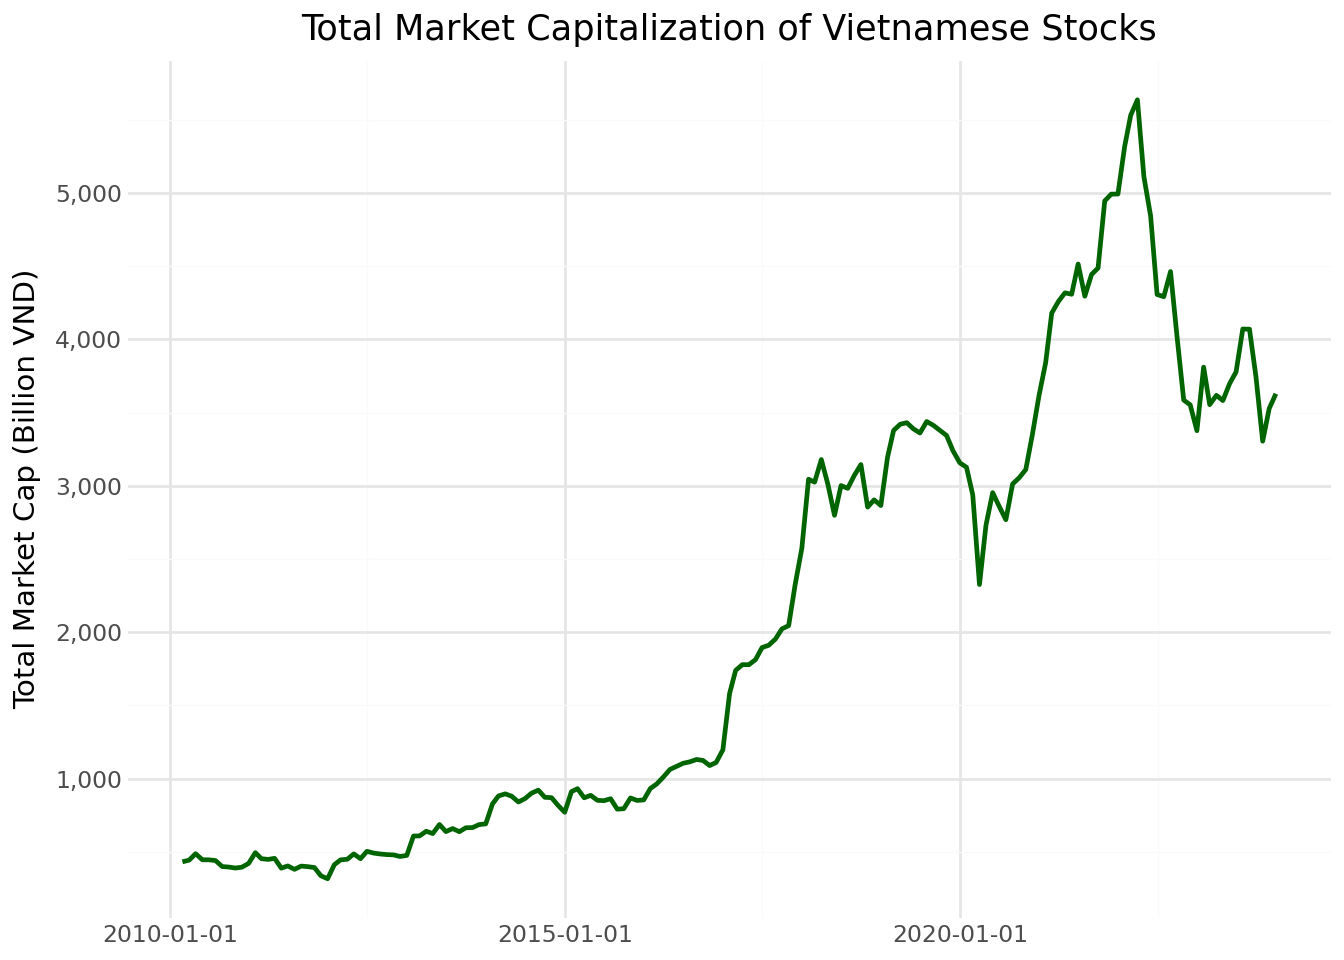

In [28]:
#| label: fig-101
#| fig-cap: The figure shows the total market capitalization of Vietnamese stocks over time.
#| fig-alt: 'Title: Total market capitalization over time. The figure shows a line chart of aggregate market cap.'

if not prices_raw.empty:
    total_mktcap = (
        prices_monthly
        .groupby("date")
        .agg(total_mktcap=("mktcap", "sum"))
        .reset_index()
    )
    
    mktcap_figure = (
        ggplot(total_mktcap, aes(x="date", y="total_mktcap/1000"))
        + geom_line(color="darkgreen", size=1)
        + labs(
            x="", y="Total Market Cap (Billion VND)",
            title="Total Market Capitalization of Vietnamese Stocks"
        )
        + scale_y_continuous(labels=comma_format())
        + theme_minimal()
    )
    
    mktcap_figure.show()

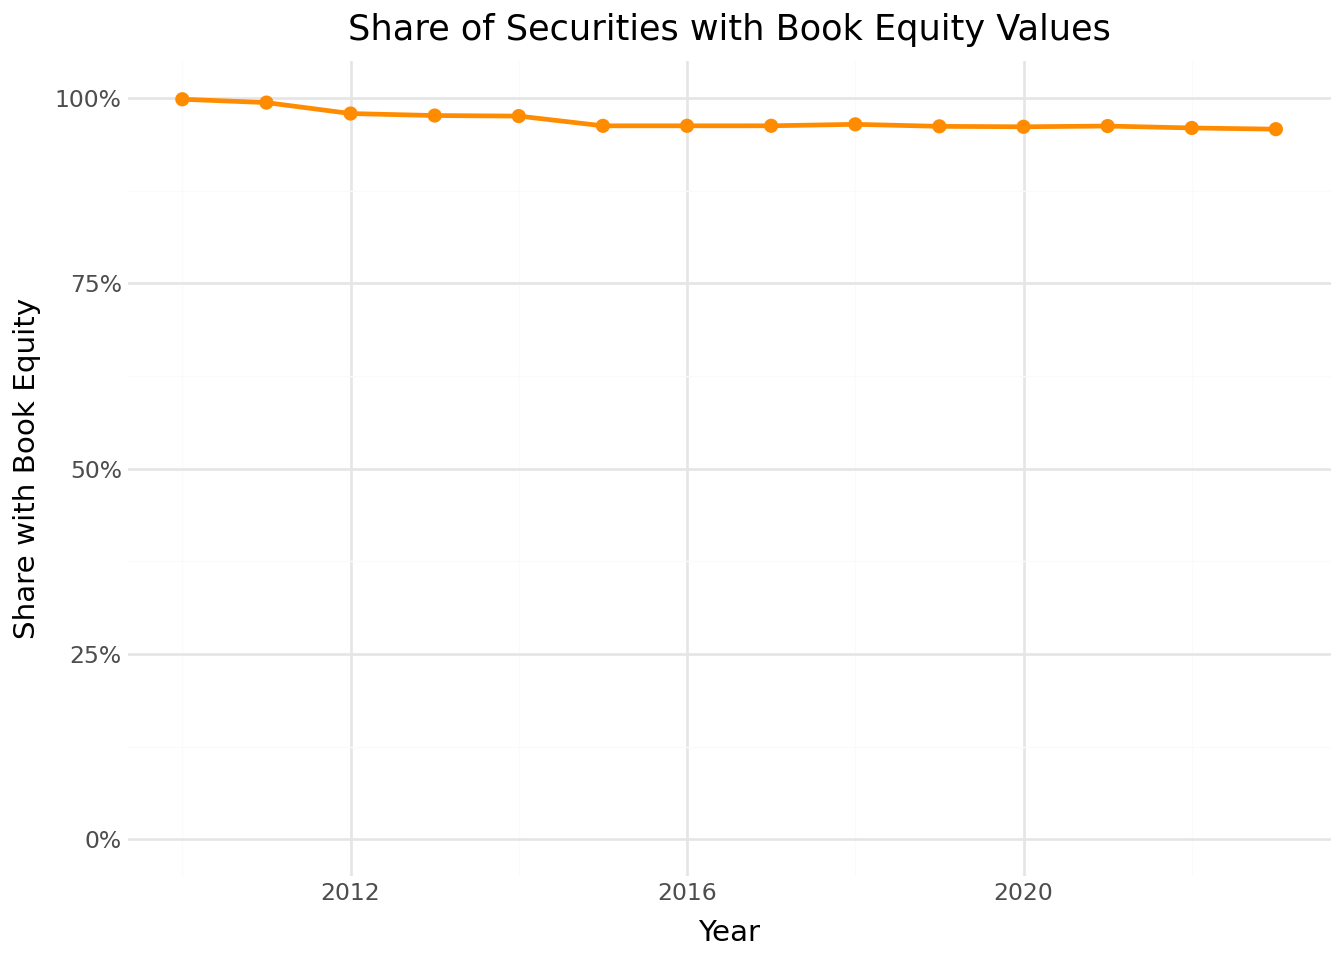

In [29]:
#| label: fig-102
#| fig-cap: The figure shows the share of securities with book equity values from financial statements.
#| fig-alt: 'Title: Share of securities with book equity. The figure shows a line chart of the percentage of securities with valid book equity data.'

if not fundamentals_raw.empty and not prices_raw.empty:
    # Merge to check book equity coverage
    share_with_be = (
        prices_monthly
        .assign(year=lambda x: x["date"].dt.year)
        .sort_values("date")
        .groupby(["symbol", "year"])
        .tail(1)
        .merge(comp_vn[["symbol", "year", "be"]], on=["symbol", "year"], how="left")
        .groupby("year")
        .apply(
            lambda x: pd.Series({
                "share_with_be": x["be"].notna().sum() / len(x)
            }),
            include_groups=False
        )
        .reset_index()
    )
    
    be_coverage_figure = (
        ggplot(share_with_be, aes(x="year", y="share_with_be"))
        + geom_line(color="darkorange", size=1)
        + geom_point(color="darkorange", size=2)
        + labs(
            x="Year", y="Share with Book Equity",
            title="Share of Securities with Book Equity Values"
        )
        + scale_y_continuous(labels=percent_format(), limits=(0, 1))
        + theme_minimal()
    )
    
    be_coverage_figure.show()

In [30]:
# Optimize database file size
tidy_finance.execute("VACUUM")
print("Database optimized")

Database optimized
